<a href="https://colab.research.google.com/github/RanojoyBiswas/Book-Recommendation-System---Ranajay-Biswas/blob/main/Book_Recommendation_System_Ranajay_Biswas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**    - Book Recommendation System



### **Contributor :** Ranajay Biswas

### **Github Link :** https://github.com/RanojoyBiswas/Book-Recommendation-System---Ranajay-Biswas

### **Project Type**    - Unsupervised

## **Project Summary -**

A recommendation system broadly recommends items to the user best suited to their tastes and traits. It uses the user's previous data and other user's data to give new recommendations.

Book Recommendation systems are popular recommendations system as most people have a very limited time that they spend on trying out and reading new books. So, when they visit an online bookstore or just simply search on the internet about some book, it becomes important to utilize this opportunity to make recommendations that are similar to what they would like.

Also it is important to consider books that are worth reading, meaning books that are popular for being good among other readers.

So, in this project, we first perform EDA (exploratory data analysis) to find popular books, credible users, their locations etc. Then we transform the datasets, different features in the pre-processing step.

As we mentioned, it is best to recommend books considering all the factors like ratings, number of ratings and the writer of the book, book's description etc.
for that we need to take different approaches like Content based and Collaborative filtering.

Content based filtering would take different features like the book title, author's name, description and find similar books whereas, Collaborative filtering will use the user-interaction metrics to recommend. So, collaborative filtering will recommend based on user ratings.

To make intelligent recommendation system, we need to consider books that are popular among the users as well. So, we declared a threshold for number of ratings that we will be considered for recommending any book.

## **Problem Statement**

Project Description
Business Context
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant.

items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.


## **Data Description & Attribute Information :**


The Book-Crossing dataset comprises 3 files.

**Users**:
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

**Books**:
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

**Ratings**:
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by O.

## **Approach:**

This project is heavily dependent upon analyzing the data and finding the most important Features that will help us to make better recommendations. We will need to pre-process the data well before using it to calculate the similarities between different books.

Our approach to solve this problem is going to be - 

1. Understanding the dataset, different rows and columns.

2. During the EDA, we will try to find popular books and authors, where most of our readers come from. By calculating the number of votes and average ratings, we will find popular books in the data. Statistical methods and Visualizations are going to be very helpful in this EDA process.

3. In the pre-processing step, we shall filter the most important features, make necessary transformations, create or omit features as needed. Depending on the features we choose, we will find best approaches for text pre-processing.

4. Books can belong to different groups based on their ratings and popularity. For that, clustering techniques will be used.

5. There is a choice to be made when it comes which recommendation system to use, as the data have both user-interaction related features and also content-related features. So, we shall try both recommender techniques and see how it goes.

6. Then we shall conclude the project with an overview and discussion about the observations that we make, about the performance of our models and how this project can prove to be useful from a business standpoint.

## **Data Collection & Summary:**

Very first step is to import the libraries for the task. We shall start off by importing the absolute necessary packages and as we continue working on the data, we will be adding more to the list.

In [191]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale = 1.5)

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score  #davies_bouldin_score of clusters 
from sklearn.preprocessing import StandardScaler

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer   # importing TfidVectorizer from sklearn library

In [192]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Collection:

In [193]:
# reading data set
books = pd.read_csv('/content/drive/MyDrive/ML Unsupervised Projects/Book Recommendation System - Ranajay Biswas/Datasets/Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ML Unsupervised Projects/Book Recommendation System - Ranajay Biswas/Datasets/Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/ML Unsupervised Projects/Book Recommendation System - Ranajay Biswas/Datasets/Users.csv')

In [194]:
pd.set_option('display.max_columns', None)

In [195]:
# books dataframe
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [196]:
# ratings dataframe
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [197]:
# users dataframe
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [198]:
# shapes of the datasets
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [199]:
# checking columns
print(f'Columns in Books data are {books.columns.tolist()}')
print(f'Columns in ratings data are {ratings.columns.tolist()}')
print(f'Columns in users data are {users.columns.tolist()}')

Columns in Books data are ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
Columns in ratings data are ['User-ID', 'ISBN', 'Book-Rating']
Columns in users data are ['User-ID', 'Location', 'Age']


## Exploratory Data Analysis (EDA) :

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

### Checking null values :

In [200]:
def missing_value_checker(dataframe):

  '''this function takes a dataframe as input and returns the count 
      and percentage of data that are misssing in each column'''

  # checking the number of null values
  number_missing = dataframe.isnull().sum()

  # checking the number of null values
  percent_missing = round(dataframe.isnull().sum() * 100 / len(dataframe), 4)

  # dataframe containing the count & percentage
  dat = pd.DataFrame(list(zip(list(dataframe.columns), number_missing, percent_missing)) , columns =['feature','observations_missing', 'percentage_missing']).set_index('feature')

  return dat


In [201]:
# books data missing
books_missing = missing_value_checker(books)
print(f'Data missing in the Books dataframe - \n')
books_missing.sort_values('observations_missing', ascending = False)

Data missing in the Books dataframe - 



,observations_missing,percentage_missing
feature,,
Image-URL-L,3,0.0011
Publisher,2,0.0007
Book-Author,1,0.0004
ISBN,0,0.0000
Book-Title,0,0.0000
Year-Of-Publication,0,0.0000
Image-URL-S,0,0.0000
Image-URL-M,0,0.0000


The amount of null values are almost negligible in the books data.

In [202]:
# ratings data missing
ratings_missing = missing_value_checker(ratings)
print(f'Data missing in the ratings dataframe - \n')
ratings_missing.sort_values('observations_missing', ascending = False)

Data missing in the ratings dataframe - 



,observations_missing,percentage_missing
feature,,
User-ID,0,0.0
ISBN,0,0.0
Book-Rating,0,0.0


No missing values in the ratings data.

In [203]:
# users data missing
users_missing = missing_value_checker(users)
print(f'Data missing in the users dataframe - \n')
users_missing.sort_values('observations_missing', ascending = False)

Data missing in the users dataframe - 



,observations_missing,percentage_missing
feature,,
Age,110762,39.7199
User-ID,0,0.0000
Location,0,0.0000


For the users data, we see that Age column has many null values. almost 40 percent data is missing for this column.

### Checking duplicates:

In [204]:
print(f'Duplicate observations in Books data are - {books.duplicated().sum()}')

Duplicate observations in Books data are - 0


In [205]:
print(f'Duplicate observations in ratings data are - {ratings.duplicated().sum()}')

Duplicate observations in ratings data are - 0


In [206]:
print(f'Duplicate observations in users data are - {users.duplicated().sum()}')

Duplicate observations in users data are - 0


The number of null values in the books data are insignificant. So, we will drop them.

In [207]:
# dropping the null values
books.dropna(inplace = True)

In [208]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [209]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  object
 4   Publisher            271354 non-null  object
 5   Image-URL-S          271354 non-null  object
 6   Image-URL-M          271354 non-null  object
 7   Image-URL-L          271354 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


Users age will not be useful even if we impute the null values in that column. And we will take a model building approach where we will not need users' age. So, we will have to drop that column.

But before dropping, let's check the distribution the rest of the data that is available in this column.

[]

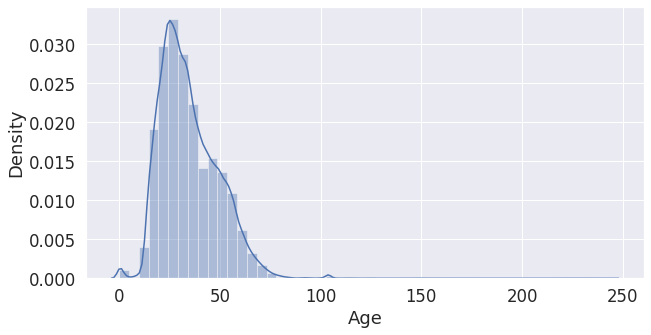

In [210]:
plt.figure(figsize = (10,5))
sns.distplot(users['Age'])
plt.plot()

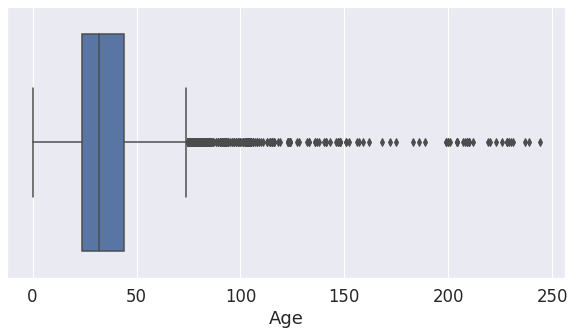

In [211]:
plt.figure(figsize = (10,5))
sns.boxplot(users['Age'])

Most of the readers are below 45 years of age. We can also see that there are many non-sensical values like all the values above 85 or 90. So, we can say that this column will not be really useful.

Total numbers of unique books:

In [212]:
# number of unique books
print(f"Total number of unique books - {books['Book-Title'].nunique()}")

Total number of unique books - 242130


### Year Of Publication:

In [213]:
yr = books['Year-Of-Publication'].value_counts().head(10)
yr = yr.reset_index().rename(columns = {'index': 'Year-Of-Publication', 'Year-Of-Publication': 'Count'})
yr

,Year-Of-Publication,Count
0,2002,13902
1,2001,13714
2,1999,13414
3,2000,13373
4,1998,12116
5,2003,11610
6,1997,11494
7,1996,10687
8,1995,10258
9,1994,8857


[Text(0.5, 1.0, 'Top 10 Years of Publications')]

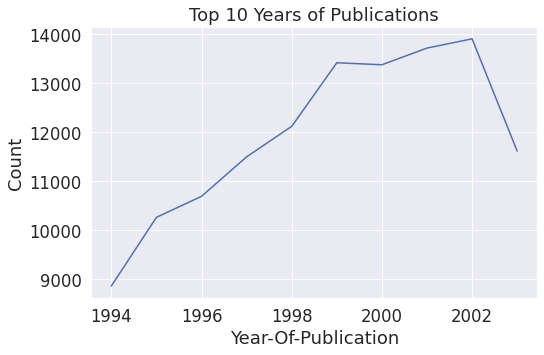

In [214]:
plt.figure(figsize= (8,5))
sns.lineplot(data = yr, x = yr['Year-Of-Publication'], y = yr['Count']).set(title='Top 10 Years of Publications')

* Most number of books were published after 1994. 
* In 2002, most number of books were published.

### Authors

We have same book titles appearing more than once in the data and for those the author is also same, so we need to drop those duplicates if we want to count the actual number of times that particular author has repeated.


In [215]:
# dropping duplicates
b = books.drop_duplicates('Book-Title')
b = b['Book-Author'].value_counts().sort_values(ascending = False).head(10).reset_index().rename(columns = {'index': 'Author', 'Book-Author': 'Count'})

In [216]:
# functionm to plot barplot
def barplot(x_col, y_col, dataframe, title = '', pal = 'hls', annot = 0, rot = 0):

  '''Input :1. x column,
            2. y column,
            3. dataframe,
            4. palette,
            5. annotation (1 = yes)
            6. rotation of x labels(1 = yes)'''
  
  plt.figure(figsize=(12,7))
  ax = sns.barplot(x = x_col , y = y_col, data = dataframe, palette = pal)
  ax.set_title(title)
  if rot == 1:
    ax.set_xticklabels(labels = dataframe[x_col], rotation=90)
  else:
    pass

  if annot == 1:
    for p in ax.patches:
      ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
  else:
    pass

  plt.show()

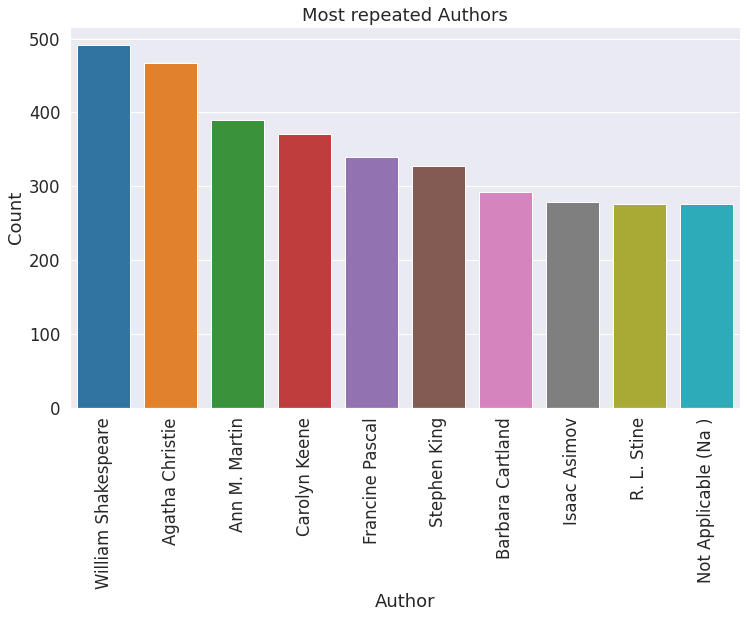

In [217]:
# visualizing most repeated authors
barplot('Author', 'Count', b, 'Most repeated Authors', rot =1, pal = 'tab10')

### Top Publishers:

In [218]:
# dropping observations with same book title
p = books.drop_duplicates('Book-Title')
p = p['Publisher'].value_counts().sort_values(ascending = False).head(10).reset_index().rename(columns = {'index': 'Publisher', 'Publisher': 'Count'})

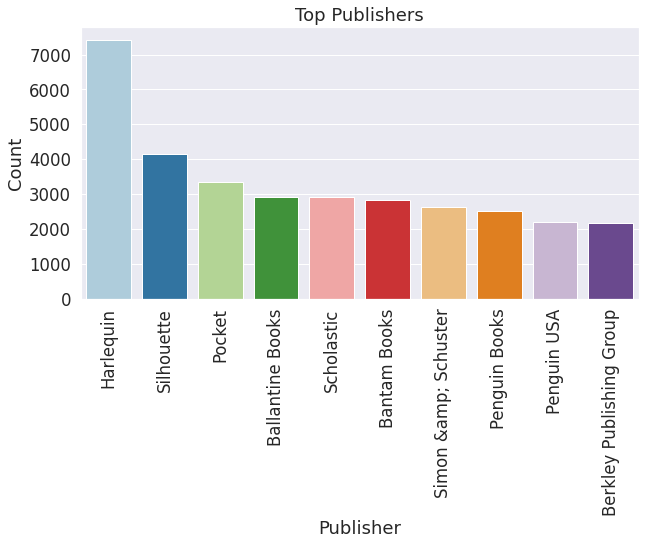

In [219]:
plt.figure(figsize = (10,5))
g = sns.barplot(x ='Publisher', y ='Count', data = p, palette = 'Paired')
g.set_xticklabels(labels = p['Publisher'], rotation=90)
g.set_title('Top Publishers')
plt.show()

Harlequinn, Silhouette and Pocket are the top 3 publishers of books in this data.

In [220]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Book Title and ISBN :

It seems that we have different ISBN numbers for the same book in the books data. Let's see if that's the case - 

In [221]:
print(f"Unique ISBN numbers in the books data - {books['ISBN'].nunique()}")
print(f'Unique Books present in the data - ',books['Book-Title'].nunique())

Unique ISBN numbers in the books data - 271354
Unique Books present in the data -  242130


We can see that there are more unique ISBn numbers compared to Book Titles. That means for some of the same book titles', we have records with different ISBN numbers.

### Users:

In [222]:
users['User-ID'].value_counts()

1         1
185904    1
185910    1
185909    1
185908    1
         ..
92959     1
92960     1
92961     1
92962     1
278858    1
Name: User-ID, Length: 278858, dtype: int64

Seems no duplicate User-IDs.

In [223]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


**Users- Countries:**

In [224]:
users['C_Location'] = users['Location'].apply(lambda x : x.split(',')[-1].lstrip())  # extracting the countries of the users

# top 5 countries where users are from
cl = users['C_Location'].value_counts().head(5).reset_index().rename(columns = {'index': 'Country', 'C_Location': 'Count'})

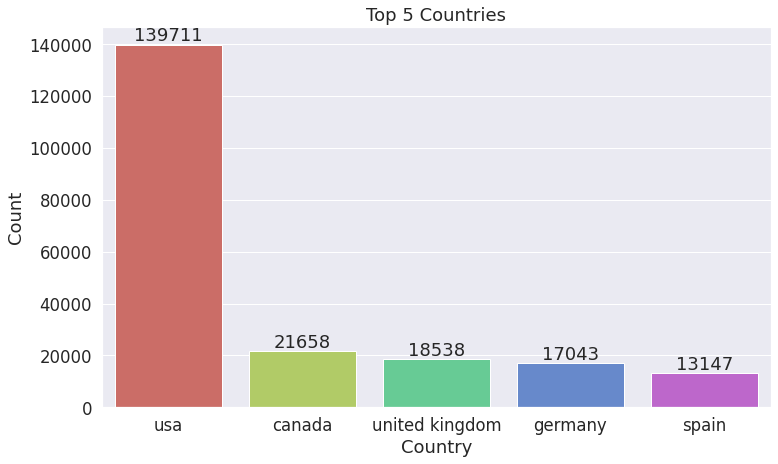

In [225]:
barplot('Country', 'Count', cl, 'Top 5 Countries', annot = 1)

The top 5 countries where most of our readers come from are - 
1. USA
2. Canada
3. United Kingdom
4. Germany
5. Spain

### Books with Most Number of Ratings:

Merging Books and Ratings Dataframes...

In [226]:
# merging books and ratings columns together on 'ISBN' column
book_ratings = ratings.merge(books,on='ISBN')

In [227]:
# missing_value_checker(book_ratings)

In [228]:
book_ratings.shape

(1031129, 10)

In [229]:
book_val = pd.DataFrame(book_ratings['Book-Title'].value_counts().sort_values(ascending = False)).reset_index().head(15)

In [230]:
book_val.rename(columns = {'index': 'Title', 'Book-Title': 'Counts'}, inplace = True)

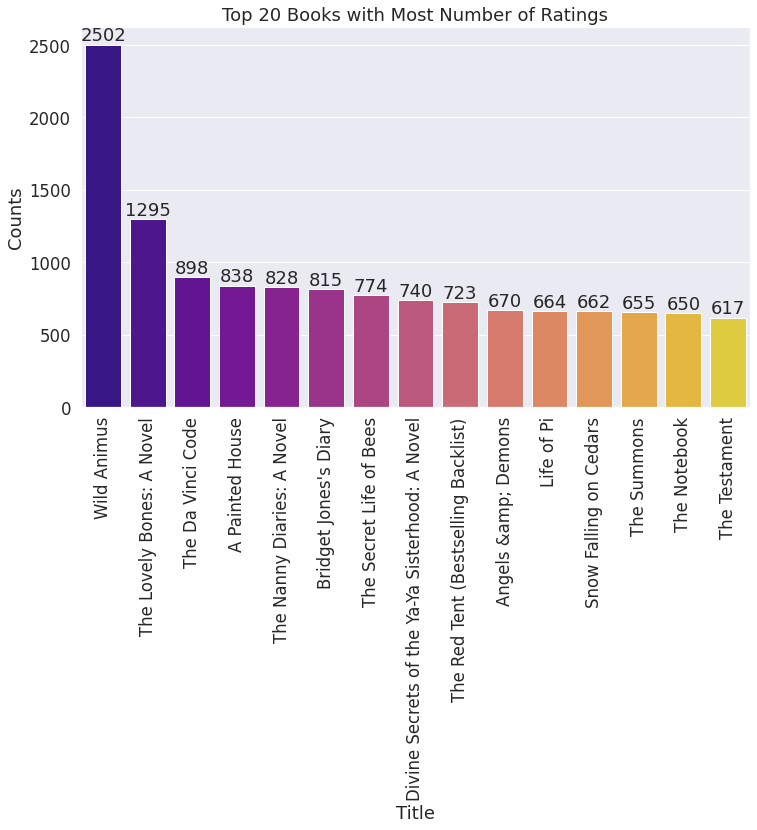

In [231]:
barplot('Title', 'Counts', book_val, 'Top 20 Books with Most Number of Ratings', pal = 'plasma', annot = 1, rot=1 )

The top 3 most rated books are - 
1. Wild Animus
2. The Lovely Bones: A /novel
3. The Da Vinci Code

### Popular Books:

In [232]:
# making a dataframe counting the number of times a book has been rated and grouping by book name
num_rating_df = book_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241061,Ã?Â?lpiraten.,2
241062,Ã?Â?rger mit Produkt X. Roman.,4
241063,Ã?Â?sterlich leben.,1
241064,Ã?Â?stlich der Berge.,3


In [233]:
# averaging all the ratings given for each book and grouping by book name
avg_rating_df = book_ratings.groupby(['Book-Title', 'Book-Author']).mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,Book-Author,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,Karen Hesse,2.250000
1,Always Have Popsicles,Rebecca Harvin,0.000000
2,Apple Magic (The Collector's series),Martina Boudreau,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",Nancy N. Rue,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,Lou Mobley,0.000000
...,...,...,...
250075,Ã?Â?lpiraten.,Janwillem van de Wetering,0.000000
250076,Ã?Â?rger mit Produkt X. Roman.,Joan Aiken,5.250000
250077,Ã?Â?sterlich leben.,Anselm GrÃ?Â¼n,7.000000
250078,Ã?Â?stlich der Berge.,David Guterson,2.666667


In [234]:
# merging average ratings df and num rating df together on book title
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')


# popular_df.drop('Book-Author_x', axis = 1, inplace = True)
popular_df.rename(columns = {'Book-Author_y': 'Book-Author'}, inplace = True)
popular_df.drop_duplicates(subset=['Book-Title'], inplace= True)

### Top rated Books :

In [235]:
# keeping only the top 50 well known books that have been rated over 200 times, then sorting by average ratings to get the most popular books
popular_df_50 = popular_df[popular_df['num_ratings']>=200].sort_values('avg_rating',ascending=False).head(50)
popular_df_50

,Book-Title,num_ratings,Book-Author,avg_rating
101402,Jurassic Park,488,Golden Books,10.000000
160866,Scarlet Feather,256,Joan Grant,10.000000
57412,Dreamcatcher,481,Audrey Osofsky,8.000000
217230,The Summons,655,Dennis McCallum,8.000000
168813,Snow Falling on Cedars,662,David G. Uterson,8.000000
241827,When the Wind Blows,396,Cyril Hare,7.000000
66205,Fahrenheit 451,409,Bradbury,6.571429
219384,"The Two Towers (The Lord of the Rings, Part 2)",260,J. R. R. Tolkien,6.197531
212419,"The Return of the King (The Lord of the Rings,...",211,J. R. R. Tolkien,6.000000
170652,Southern Cross,236,Jim Debrosse,6.000000


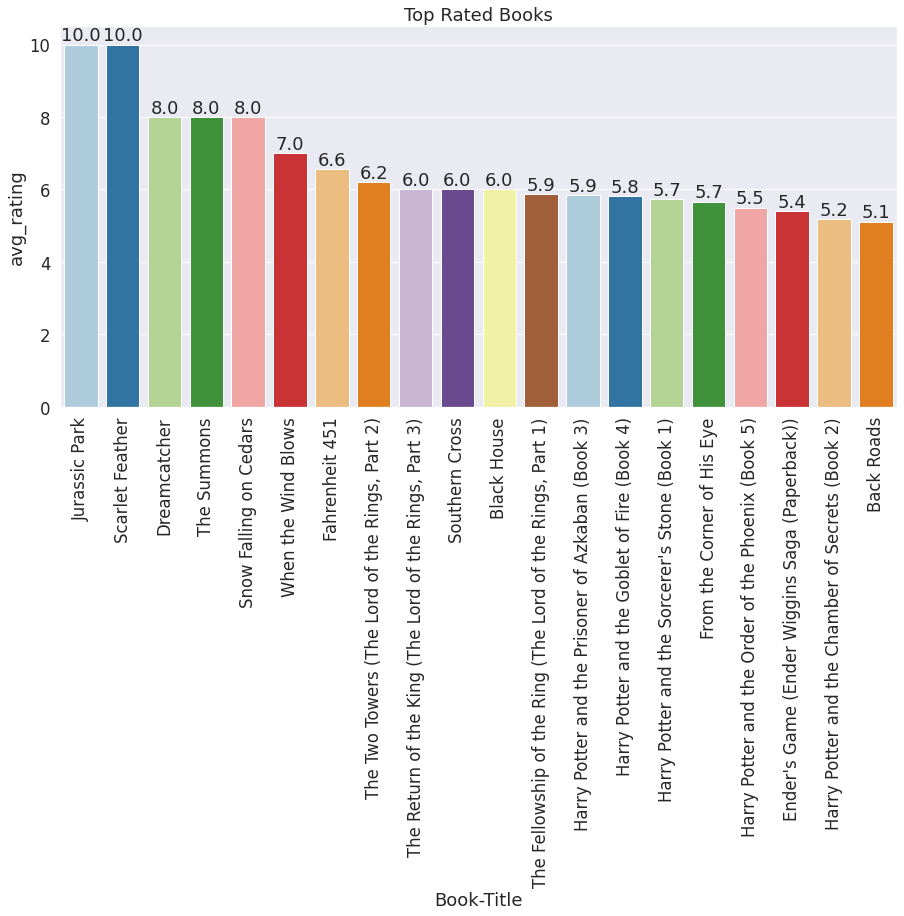

In [236]:
# visualizing top rated books
plt.figure(figsize=(15,7))
ax = sns.barplot(x = 'Book-Title' , y = 'avg_rating', data = popular_df_50.head(20), palette = 'Paired')
ax.set_title('Top Rated Books')
ax.set_xticklabels(labels = popular_df_50['Book-Title'], rotation=90)

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', va = 'center', 
            xytext = (0, 9), 
            textcoords = 'offset points')

plt.show()

We can see,
* Jurassic Park is the top rated book. 
* Harry Potter books, The Hobbit and Lord of the Rings books are also very popular among the readers. 


Then we have many other great books as well. We can use these top 50 popular books as a catalouge in Book recommendation website.

## Content Based Filtering:

### Pre-processing for CBF:

In [237]:
# pdf = pd.DataFrame(book_ratings.groupby('Book-Title')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False)

In [238]:
popular_df.head()

,Book-Title,num_ratings,Book-Author,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,Karen Hesse,2.25
1,Always Have Popsicles,1,Rebecca Harvin,0.00
2,Apple Magic (The Collector's series),1,Martina Boudreau,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,Nancy N. Rue,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,Lou Mobley,0.00


selecting only those books that have atleast 50 ratings.

In [239]:
popularity_threshold = 50
popular_book = popular_df[popular_df['num_ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(2444, 4)

In [240]:
popular_book.head()

,Book-Title,num_ratings,Book-Author,avg_rating
0,10 Lb. Penalty,61,Dick Francis,2.311475
1,16 Lighthouse Road,65,Debbie Macomber,1.907692
2,1984,284,George Orwell,4.454225
3,1st to Die: A Novel,509,James Patterson,3.575639
4,2010: Odyssey Two,90,Arthur C. Clarke,2.654321


In [241]:
popular_book['tags'] = popular_book['Book-Title'] + popular_book['Book-Author']

In [242]:
#Applying Tfidf Vectorizer on tags feature
tfidfmodel = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')  # lowercasing is done by default & english stop words will be removed
X1 = tfidfmodel.fit_transform(popular_book['tags'])
X1.shape

(2444, 11166)

In [243]:
normalized_df = X1.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(2444, 2444)

### **Content Based Filtering :**

Content-based Filtering is a Machine Learning technique that uses similarities in features to make decisions.

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.



In [244]:
# content Based Recommender System
def cont_recommend(book):

    index = popular_book[popular_book['Book-Title'] == book].index[0]  # index of the input
    # extracting similarity scores and indices
    distances = sorted(list(enumerate(cosine_similarities[index])),reverse=True,key = lambda x: x[1])   # sorting by similarity score 

    cont = []
    for i in distances[1:6]: # top 5 most most similar excluding self

      # print(popular_book.iloc[i[0]]['Book-Title'])
      cont.append(popular_book.iloc[i[0]]['Book-Title'])
      
    return cont

**Testing the Content Based Recommendation System:**

In [245]:
cont_recommend('The Hobbit : The Enchanting Prelude to The Lord of the Rings')

['The Hobbit: or There and Back Again',
 'The Two Towers (The Lord of the Rings, Part 2)',
 'The Return of the King (The Lord of the Rings, Part 3)',
 'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 'The Lord of the Rings (Movie Art Cover)']

In [246]:
cont_recommend('Harry Potter and the Prisoner of Azkaban (Book 3)')

['Harry Potter and the Goblet of Fire (Book 4)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 'Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"]

In [247]:
cont_recommend('The Two Towers (The Lord of the Rings, Part 2)')

['The Return of the King (The Lord of the Rings, Part 3)',
 'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 'The Lord of the Rings (Movie Art Cover)',
 'The Hobbit : The Enchanting Prelude to The Lord of the Rings',
 'The Hobbit']

## Collaborative Recommendation System:

In order to get best recommendations, we need to set some rules for our recommender system.

1. We will pick only those users who have rated atleast 200 books. That gives us some confidence on their book-rating credibility.

2. We will only use books that have been rated atleast 50  times. That way we can make sure to get the more popular books.

In [248]:
# users with more than 200 ratings
x = book_ratings.groupby('User-ID').count()['Book-Rating']>200

# extracting the index or in this case the user Ids
users_to_consider = x[x].index
users_to_consider

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [249]:
print(f"Originally we had {book_ratings['User-ID'].nunique()} users in the data.")
print(f"After filterng for users who have given atleast 200 ratings, we have only {len(users_to_consider)} users.")

Originally we had 92106 users in the data.
After filterng for users who have given atleast 200 ratings, we have only 811 users.


In [250]:
# matching the user_ids
filtered_rating = book_ratings[book_ratings['User-ID'].isin(users_to_consider)]

In [251]:
filtered_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [252]:
# books having more than 50 ratings
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [253]:
# name of the famous books
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [254]:
# finally keeping the books with atleast 50 ratings and users with atleast 200 votes
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [255]:
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


Next, we shall create a pivot table which will have the book names as indexes and user ids in columns. For each book, whenver we find bbok rating for each user. We shall make a sparse matrix.

In [256]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [257]:
pt.head(2)

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,16106,16634,16795,16916,16966,17950,18067,18401,19085,19664,20115,20201,21014,21252,21576,21659,22625,23288,23768,23872,23902,24194,24921,25409,25601,25981,26516,26535,26544,26583,26593,27617,28204,28360,28523,28591,29259,29855,30276,30487,30511,30533,30711,30735,30972,31315,31391,31556,31826,31846,32195,32440,32721,32773,33974,35050,35836,35857,35859,36606,36609,36836,36907,37567,37712,37950,38023,38273,38781,39281,39467,39616,39646,39773,40889,40943,41084,41841,42914,43246,43806,43842,44595,44728,46398,47316,48494,49109,49460,49889,50225,51094,51350,51386,51450,51883,52199,52584,52614,52853,52917,53174,53628,53729,54218,55187,55490,55492,55548,55734,55892,56271,56399,56447,56856,56959,59172,59971,60244,60277,60337,60707,61619,62272,62891,62895,63394,63714,63938,64436,65258,66680,67840,68555,69042,69078,69232,69355,69405,69697,69808,69971,70052,70415,70594,71712,72352,72992,73394,73651,75591,75860,76151,76223,76352,76499,76626,76818,76942,77809,77940,78553,78783,78834,78973,79186,79441,80538,80683,81045,81492,81560,81977,82407,82831,82893,82926,83637,84024,85426,85526,85656,85701,85757,85993,86202,86243,86641,87141,87143,87555,87746,87974,88283,88677,88693,88733,88937,89602,91203,91342,91832,91931,92547,92652,92810,92979,93047,93085,93363,93629,94242,94347,94853,94923,95193,95316,95359,95903,95932,95991,96054,96448,97874,98391,98741,98758,100459,100644,100846,100906,101209,101851,101876,102275,102647,102702,102967,104399,104429,104636,104665,105374,105517,105979,106225,106816,107021,107301,107453,107784,107951,108005,108285,108352,109461,109574,109955,110029,110483,110912,110934,110973,111174,111947,112001,112026,112881,113270,113519,113817,113904,113983,114178,114368,114414,114444,114868,114988,115002,115003,115120,115490,116599,117251,117539,119575,120093,120548,122429,122793,122881,123790,123883,123981,124078,124079,124363,124487,124942,125039,125519,125692,125774,126492,126604,126736,127200,127233,127359,127429,127914,128696,128835,129008,129074,129358,129465,129716,129851,130474,130554,130571,131027,131046,131402,131837,131855,132083,133571,133689,133747,133868,135045,135149,135265,135458,135831,136010,136139,136205,136252,136382,137589,137688,138097,138441,138578,138844,139467,139742,140000,140036,140358,141493,141710,142093,142524,143175,143253,143415,143792,144531,144555,145449,145451,145619,145641,146113,146230,146348,147141,147451,147847,147965,148199,148258,148744,149069,149907,149908,149934,150124,150498,150968,150979,151790,151806,152186,152249,153563,153662,153718,154992,155014,155147,155219,155495,156150,156269,156467,157273,157811,158295,159033,159376,159858,160032,160819,161752,162052,162639,162738,163804,163973,164027,164323,164465,164533,164675,164828,165232,165308,165319,166123,166596,167349,167471,167800,168047,168064,168144,168245,169233,169663,169699,170229,170513,170518,170575,170634,170742,170947,171118,172030,172512,172742,173291,173415,173632,173684,173835,174216,174304,174791,175003,175886,177072,177090,177374,177432,177458,177690,178181,178199,178667,178950,179733,179744,179772,179978,180348,180586,180651,180917,180957,181176,181687,182085,182086,182987,182993,183196,183995,184299,185233,185384,186570,187145,187256,187517,188010,189334,189516,189835,189973,190459,190708,190807,190925,191187,192093,193499,193560,194600,194669,195694,196047,196077,196160,196457,196502,197364,197659,197775,198621,198699,198711,199416,199772,200226,200674,201017,201290,201447,201526,201674,201768,201783,203240,203799,203968,204167,204522,204591,204864,205473,205735,205980,206074,206534,206567,206979,207246,207349,207499,207782,208141,208147,208406,208410,208568,208671,208829,209373,209516,209756,209875,210035,210485,210792,210959,211426,211430,211847,211919,212645,212898,212923,212965,213150,213350,214272,214786,216012

In [258]:
# filling the nulls with 0
pt.fillna(0,inplace=True)

In [259]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,16106,16634,16795,16916,16966,17950,18067,18401,19085,19664,20115,20201,21014,21252,21576,21659,22625,23288,23768,23872,23902,24194,24921,25409,25601,25981,26516,26535,26544,26583,26593,27617,28204,28360,28523,28591,29259,29855,30276,30487,30511,30533,30711,30735,30972,31315,31391,31556,31826,31846,32195,32440,32721,32773,33974,35050,35836,35857,35859,36606,36609,36836,36907,37567,37712,37950,38023,38273,38781,39281,39467,39616,39646,39773,40889,40943,41084,41841,42914,43246,43806,43842,44595,44728,46398,47316,48494,49109,49460,49889,50225,51094,51350,51386,51450,51883,52199,52584,52614,52853,52917,53174,53628,53729,54218,55187,55490,55492,55548,55734,55892,56271,56399,56447,56856,56959,59172,59971,60244,60277,60337,60707,61619,62272,62891,62895,63394,63714,63938,64436,65258,66680,67840,68555,69042,69078,69232,69355,69405,69697,69808,69971,70052,70415,70594,71712,72352,72992,73394,73651,75591,75860,76151,76223,76352,76499,76626,76818,76942,77809,77940,78553,78783,78834,78973,79186,79441,80538,80683,81045,81492,81560,81977,82407,82831,82893,82926,83637,84024,85426,85526,85656,85701,85757,85993,86202,86243,86641,87141,87143,87555,87746,87974,88283,88677,88693,88733,88937,89602,91203,91342,91832,91931,92547,92652,92810,92979,93047,93085,93363,93629,94242,94347,94853,94923,95193,95316,95359,95903,95932,95991,96054,96448,97874,98391,98741,98758,100459,100644,100846,100906,101209,101851,101876,102275,102647,102702,102967,104399,104429,104636,104665,105374,105517,105979,106225,106816,107021,107301,107453,107784,107951,108005,108285,108352,109461,109574,109955,110029,110483,110912,110934,110973,111174,111947,112001,112026,112881,113270,113519,113817,113904,113983,114178,114368,114414,114444,114868,114988,115002,115003,115120,115490,116599,117251,117539,119575,120093,120548,122429,122793,122881,123790,123883,123981,124078,124079,124363,124487,124942,125039,125519,125692,125774,126492,126604,126736,127200,127233,127359,127429,127914,128696,128835,129008,129074,129358,129465,129716,129851,130474,130554,130571,131027,131046,131402,131837,131855,132083,133571,133689,133747,133868,135045,135149,135265,135458,135831,136010,136139,136205,136252,136382,137589,137688,138097,138441,138578,138844,139467,139742,140000,140036,140358,141493,141710,142093,142524,143175,143253,143415,143792,144531,144555,145449,145451,145619,145641,146113,146230,146348,147141,147451,147847,147965,148199,148258,148744,149069,149907,149908,149934,150124,150498,150968,150979,151790,151806,152186,152249,153563,153662,153718,154992,155014,155147,155219,155495,156150,156269,156467,157273,157811,158295,159033,159376,159858,160032,160819,161752,162052,162639,162738,163804,163973,164027,164323,164465,164533,164675,164828,165232,165308,165319,166123,166596,167349,167471,167800,168047,168064,168144,168245,169233,169663,169699,170229,170513,170518,170575,170634,170742,170947,171118,172030,172512,172742,173291,173415,173632,173684,173835,174216,174304,174791,175003,175886,177072,177090,177374,177432,177458,177690,178181,178199,178667,178950,179733,179744,179772,179978,180348,180586,180651,180917,180957,181176,181687,182085,182086,182987,182993,183196,183995,184299,185233,185384,186570,187145,187256,187517,188010,189334,189516,189835,189973,190459,190708,190807,190925,191187,192093,193499,193560,194600,194669,195694,196047,196077,196160,196457,196502,197364,197659,197775,198621,198699,198711,199416,199772,200226,200674,201017,201290,201447,201526,201674,201768,201783,203240,203799,203968,204167,204522,204591,204864,205473,205735,205980,206074,206534,206567,206979,207246,207349,207499,207782,208141,208147,208406,208410,208568,208671,208829,209373,209516,209756,209875,210035,210485,210792,210959,211426,211430,211847,211919,212645,212898,212923,212965,213150,213350,214272,214786,216012

we have the sparse matrix.

In [260]:
pt.shape

(706, 810)

we have total 707 books and 811 users.

Now, we need to calculate similarities. we will use Cosine similarities.

In [261]:
sim = cosine_similarity(pt)
sim

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [262]:
# similarity matrix shape
sim.shape

(706, 706)

We have similaries of each book against every other book in the data.

### **Collaborative Filtering :**

Collaborative filtering (CF) is the process of filtering or evaluating items through the opinions of other people. CF technology brings together the opinions of large interconnected communities on the web, supporting filtering of substantial quantities of data.

To put it simply, collaborative filtering is a recommendation system that creates a prediction based on a user's previous behaviors.


In [263]:
# collaborative recommendation system 

def collab_recommend(book_name):
    # extracting the index that matches the input book name
    index = np.where(pt.index==book_name)[0][0]


    similar_books = sorted(list(enumerate(sim[index])), key= lambda x:x[1], reverse = True)[1:6]

    collab = []
    for i in similar_books:
      # print(list(books[books['Book-Title'] == pt.index[i[0]]]['Book-Title'].values)[0])
      collab.append(list(books[books['Book-Title'] == pt.index[i[0]]]['Book-Title'].values)[0])

    return collab

**Recommendations made by the Collaborative Filtering System:**

In [264]:
collab_recommend('1984')

['Animal Farm',
 "The Handmaid's Tale",
 'Brave New World',
 'The Vampire Lestat (Vampire Chronicles, Book II)',
 'The Hours : A Novel']

In [265]:
collab_recommend('Harry Potter and the Prisoner of Azkaban (Book 3)')

['Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"]

In [266]:
collab_recommend('The Two Towers (The Lord of the Rings, Part 2)')

['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 'The Return of the King (The Lord of the Rings, Part 3)',
 "Charlotte's Web (Trophy Newbery)",
 'The Hobbit : The Enchanting Prelude to The Lord of the Rings',
 'It Was on Fire When I Lay Down on It']

In [267]:
collab_recommend('The Notebook')

['A Walk to Remember',
 'The Rescue',
 'One Door Away from Heaven',
 'Toxin',
 'The Five People You Meet in Heaven']

## Hybrid Recommender System:

A hybrid recommendation system is a special type of recommendation system which can be considered as the combination of the content and collaborative filtering method. Combining collaborative and content-based filtering together may help in overcoming the shortcoming we are facing at using them separately and also can be more effective in some cases. 

Hybrid recommender system approaches can be implemented in various ways like by using content and collaborative-based methods to generate predictions separately and then combining the prediction or we can just add the capabilities of collaborative-based methods to a content-based approach (and vice versa). 

This Hybrid Recommender system will take advantage of both Collaborative and Content Based filtering, meaning this will check recommendations made by the two different methods and match those against each other. The recommendations that come on both sides, will be recommended by the Hybrid system.

If no matches found somehow, then it will return the recommendations that were made by Collaborative Filtering System.

In [268]:
def hybrid_recommend(book):
  hybrid = []

  # matches the recommendations for content based and collaborative filtering
  for i in collab_recommend(book):
    if i in cont_recommend(book):
      hybrid.append(i)

  # if matches less than 3 books, then hybrid is replaced by collaborative recommendations
  if len(hybrid) < 3:
    return collab_recommend(book)
  else:
    return (hybrid)

  # return hybrid

**Recommendations made by Hybrid Recommender System :**

In [269]:
hybrid_recommend('The Two Towers (The Lord of the Rings, Part 2)')

['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 'The Return of the King (The Lord of the Rings, Part 3)',
 'The Hobbit : The Enchanting Prelude to The Lord of the Rings']

In [270]:
hybrid_recommend('1984')

['Animal Farm',
 "The Handmaid's Tale",
 'Brave New World',
 'The Vampire Lestat (Vampire Chronicles, Book II)',
 'The Hours : A Novel']

In [271]:
hybrid_recommend('Harry Potter and the Prisoner of Azkaban (Book 3)')

['Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"]

In [272]:
hybrid_recommend('The Notebook')

['A Walk to Remember',
 'The Rescue',
 'One Door Away from Heaven',
 'Toxin',
 'The Five People You Meet in Heaven']

## Clustering :

In [273]:
# creating feature for clustering multiplying num_rating with avg_rating
popular_book['tags2'] = (popular_book['num_ratings'])*(popular_book['avg_rating'])

In [274]:
# #Applying Tfidf Vectorizer on tags feature
# tfidfmodel = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')  # lowercasing is done by default & english stop words will be removed
# X1 = tfidfmodel.fit_transform(popular_book['tags2'])
# X1.shape

In [275]:
# using standard scaler for standardization
# X = pd.DataFrame(StandardScaler().fit_transform(X1.toarray()))

In [276]:
# # reducing the dimentionality
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(X)

In [277]:
# reshaping so that it can be sent through ml Algos
cl_feature = popular_book['tags2'].values.reshape(-1,1)

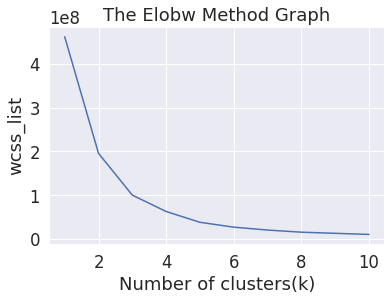

In [278]:
#finding optimal number of clusters using the elbow method  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 30.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 7)  
    kmeans.fit(cl_feature)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [279]:
from sklearn.metrics import silhouette_score
#Silhouette  score of clusters 
sill = [] 
for i in range(2,11):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=7)
    model.fit(cl_feature)
    y1 = model.predict(cl_feature)
    score = silhouette_score(cl_feature,y1)
    sill.append(score)
    print('cluster: %d \t Silhouette : %0.4f'%(i,score))

cluster: 2 	 Silhouette : 0.8109
cluster: 3 	 Silhouette : 0.7208
cluster: 4 	 Silhouette : 0.6510
cluster: 5 	 Silhouette : 0.6494
cluster: 6 	 Silhouette : 0.5466
cluster: 7 	 Silhouette : 0.5452
cluster: 8 	 Silhouette : 0.5246
cluster: 9 	 Silhouette : 0.5250
cluster: 10 	 Silhouette : 0.5163


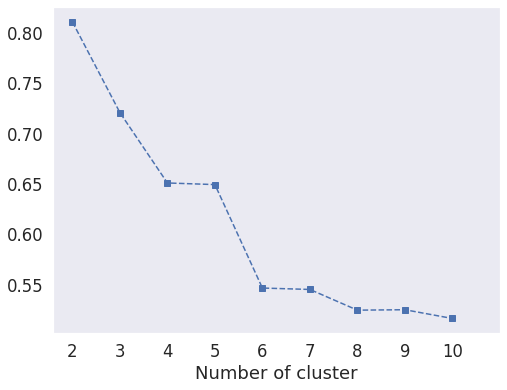

In [280]:
#Plotting Silhouette's score
plt.figure(figsize=(8, 6))
plt.plot(sill,'bs--')
plt.xticks(list(range(0,10)),list(range(2,11)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

4 seems to be optimal number of clusters.

In [281]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters= 4, init='k-means++', random_state= 7)  
y_predict= kmeans.fit_predict(cl_feature) 

In [282]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(cl_feature, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.6509621237726778


In [283]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(cl_feature, y_predict)

0.5261697572188504

In [284]:
#Adding a seperate column for the cluster
popular_book["cluster"] = y_predict

In [285]:
popular_book.head()

,Book-Title,num_ratings,Book-Author,avg_rating,tags,tags2,cluster
0,10 Lb. Penalty,61,Dick Francis,2.311475,10 Lb. PenaltyDick Francis,141.000000,0
1,16 Lighthouse Road,65,Debbie Macomber,1.907692,16 Lighthouse RoadDebbie Macomber,124.000000,0
2,1984,284,George Orwell,4.454225,1984George Orwell,1265.000000,1
3,1st to Die: A Novel,509,James Patterson,3.575639,1st to Die: A NovelJames Patterson,1820.000000,1
4,2010: Odyssey Two,90,Arthur C. Clarke,2.654321,2010: Odyssey TwoArthur C. Clarke,238.888889,0


## Cluster Analysis :

In [286]:
popular_book['cluster'].value_counts()

0    1784
3     501
1     134
2      25
Name: cluster, dtype: int64

In [287]:
# dataframe with only observations belonging to those clusters
cl_0 = popular_book[popular_book['cluster'] == 0]
cl_1 = popular_book[popular_book['cluster'] == 1]
cl_2 = popular_book[popular_book['cluster'] == 2]
cl_3 = popular_book[popular_book['cluster'] == 3]

### Cluster 0 analysis:

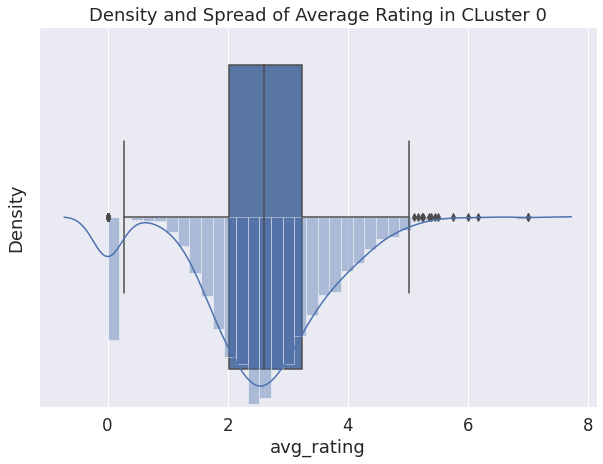

In [288]:
plt.figure(figsize= (10,7))
sns.boxplot(cl_0['avg_rating'])
sns.distplot(cl_0['avg_rating'])
plt.title('Density and Spread of Average Rating in CLuster 0')
plt.show()

For cluster 0, we see that most books have an average rating of 2 - 3.5 out of 10.

Outliers are present both sides.

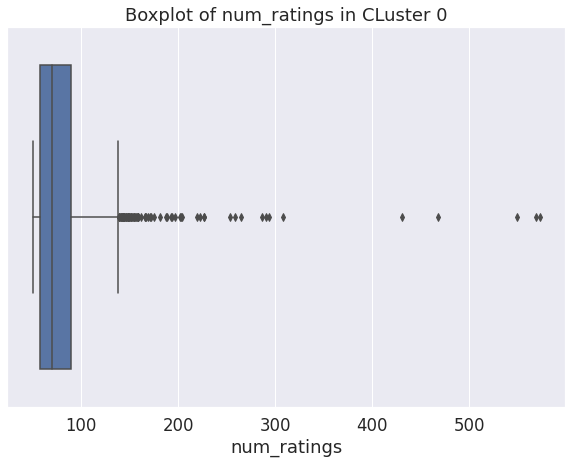

In [289]:
plt.figure(figsize= (10,7))
sns.boxplot(cl_0['num_ratings'])
# sns.distplot(cl_0['num_ratings'])
plt.title('Boxplot of num_ratings in CLuster 0')
plt.show()

Most books have been rated less than 100 times.

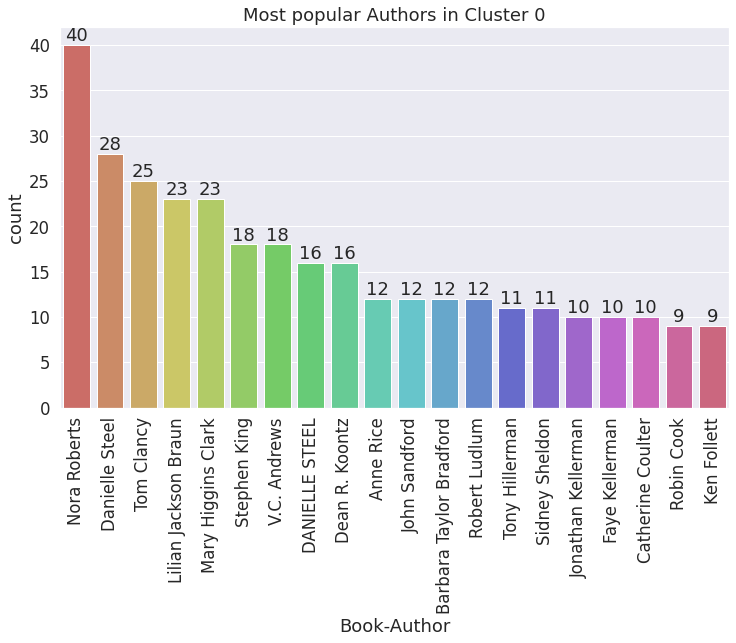

In [290]:
author = cl_0['Book-Author'].value_counts().reset_index().rename(columns = {'index': 'Book-Author', 'Book-Author':'count'})

# top 20 most repeating authors
author = author.head(20)

# visualizing
barplot('Book-Author', 'count', author, 'Most popular Authors in Cluster 0', rot=1, annot = 1)

### Cluster 1 analysis:

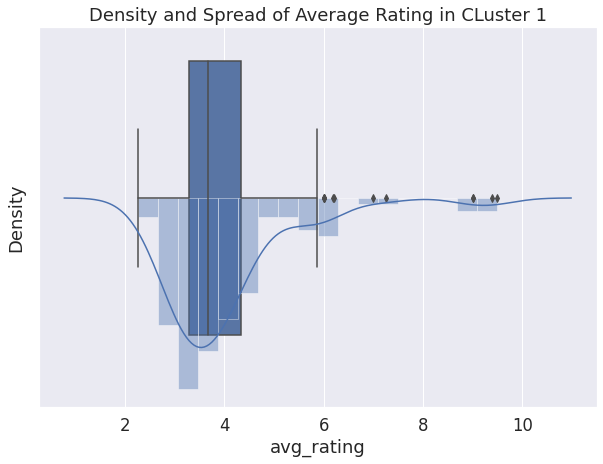

In [291]:
plt.figure(figsize= (10,7))
sns.boxplot(cl_1['avg_rating'])
sns.distplot(cl_1['avg_rating'])
plt.title('Density and Spread of Average Rating in CLuster 1')
plt.show()

For cluster 1, we see that most books have an average rating of 3.5 - 4.5 out of 10.

Outliers are present both sides.

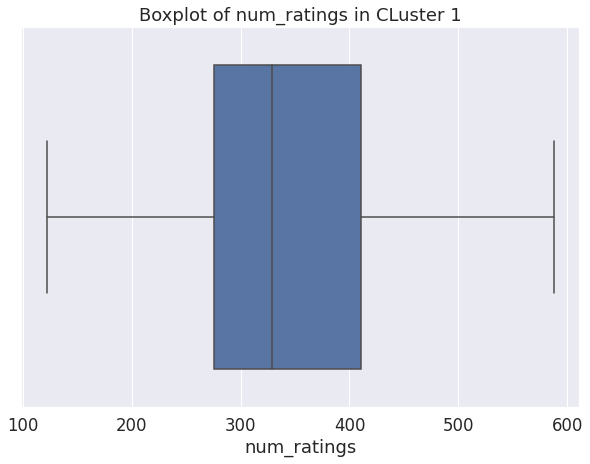

In [292]:
plt.figure(figsize= (10,7))
sns.boxplot(cl_1['num_ratings'])
# sns.distplot(cl_0['num_ratings'])
plt.title('Boxplot of num_ratings in CLuster 1')
plt.show()

Most books have been rated around 300-400 times.

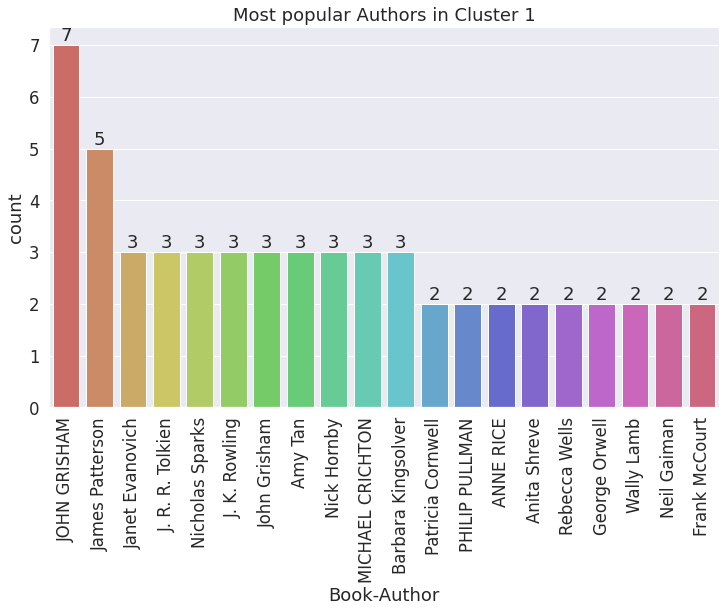

In [293]:
author = cl_1['Book-Author'].value_counts().reset_index().rename(columns = {'index': 'Book-Author', 'Book-Author':'count'})

# top 20 most repeating authors
author = author.head(20)

# visualizing
barplot('Book-Author', 'count', author, 'Most popular Authors in Cluster 1', rot=1, annot = 1)

### Cluster 2 analysis:

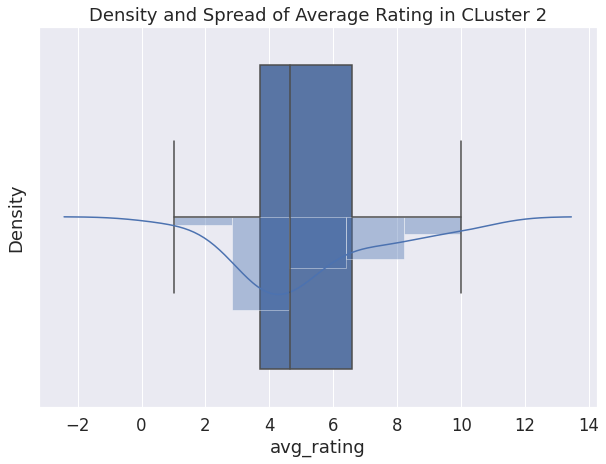

In [294]:
plt.figure(figsize= (10,7))
sns.boxplot(cl_2['avg_rating'])
sns.distplot(cl_2['avg_rating'])
plt.title('Density and Spread of Average Rating in CLuster 2')
plt.show()

For cluster 2, we see that most books have an average rating of 4 - 6 out of 10.

Outliers are present both sides.

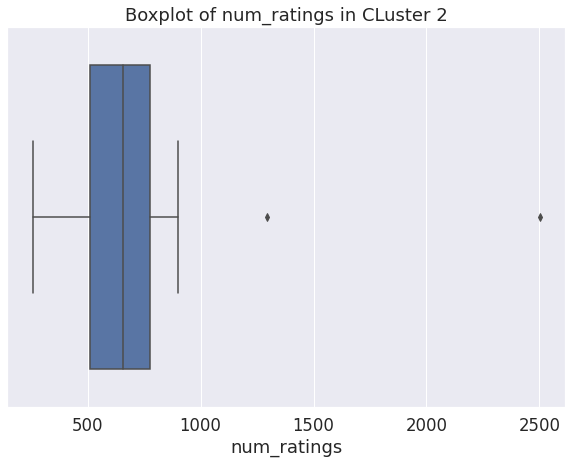

In [295]:
plt.figure(figsize= (10,7))
sns.boxplot(cl_2['num_ratings'])
# sns.distplot(cl_0['num_ratings'])
plt.title('Boxplot of num_ratings in CLuster 2')
plt.show()

Most books have been rated more than 500 times.

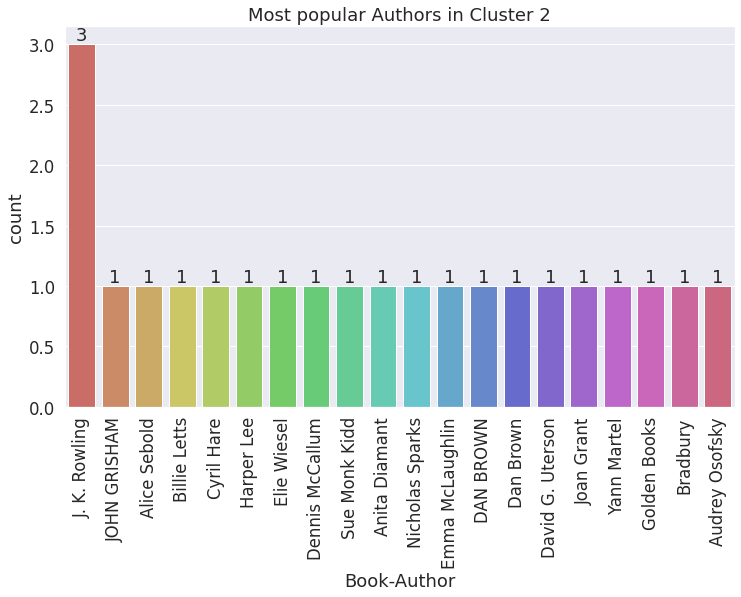

In [296]:
author = cl_2['Book-Author'].value_counts().reset_index().rename(columns = {'index': 'Book-Author', 'Book-Author':'count'})

# top 20 most repeating authors
author = author.head(20)

# visualizing
barplot('Book-Author', 'count', author, 'Most popular Authors in Cluster 2', rot=1, annot = 1)

### Cluster 3 analysis:

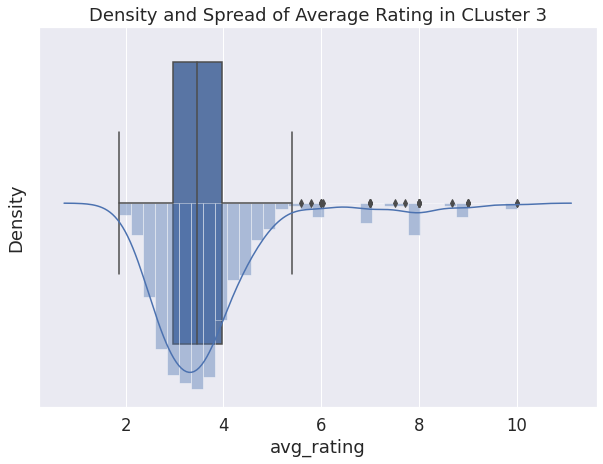

In [297]:
plt.figure(figsize= (10,7))
sns.boxplot(cl_3['avg_rating'])
sns.distplot(cl_3['avg_rating'])
plt.title('Density and Spread of Average Rating in CLuster 3')
plt.show()

For cluster 3, we see that most books have an average rating of 3 - 4 out of 10.

Outliers are present both sides.

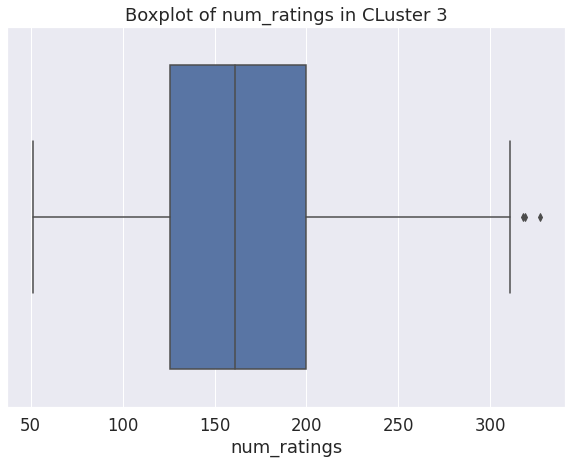

In [298]:
plt.figure(figsize= (10,7))
sns.boxplot(cl_3['num_ratings'])
# sns.distplot(cl_0['num_ratings'])
plt.title('Boxplot of num_ratings in CLuster 3')
plt.show()

Most books have been rated 100 - 200 times.

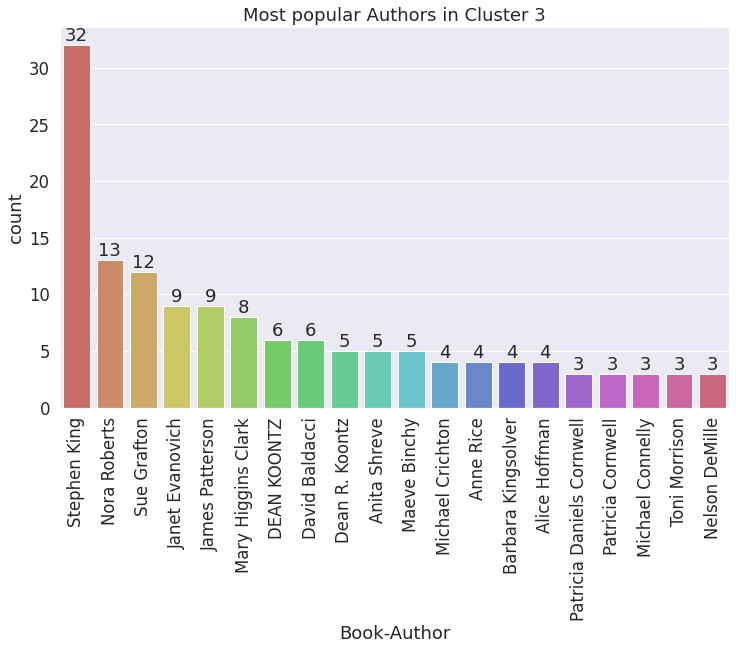

In [299]:
author = cl_3['Book-Author'].value_counts().reset_index().rename(columns = {'index': 'Book-Author', 'Book-Author':'count'})

# top 20 most repeating authors
author = author.head(20)

# visualizing
barplot('Book-Author', 'count', author, 'Most popular Authors in Cluster 3', rot=1, annot = 1)

### Observations from Cluster Analysis :

* Cluster 2 books have been rated the most number of times and they are also the top rated books. So, books in this cluster are going to be many people's go to choice.

* By the number of ratings received, we see that cluster 1 books are popular but they have an average rating of 3.5 - 4.5
* Cluster 0 books have the lowest average rating and also they are least popular. Books in cluster 3 are slightly better than Cluster 0

* J.K. Rowling is noticable in both cluster 1 and cluster 2

## Conclusion:



To summarize what we have done,

**Steps Performed**- 
* We performed EDA on the 3 different datasets.
* Made visualizations and found insights from the data.
* Performed different pre-processing techniques to prepare the data for send it to the recommendation systems.
* Implemented Content based, Colaborative and Hybrid Recommendation systems that are being able to efficiently recommend similar books.

**Observations** :
* In the EDA, we found most of the readers are from USA, Canada, UK, Germany and Spain.
* We found the top authors and publishers.
* Discovered the top rated books and most number of rated books.
* Many records were missing for users' age. Many of the existing information was invalid for this particular feature as well.
* we noticed that for many books, very small number of ratings were present which does not really give us an idea if those books are actually good or not. Also not all the users should be considered when building a recommendation system. We want genuine, credible and unbiased users. So, we declared thresholds in terms of selecting users and books that will be considered for recommendations.  
* We had user-item data and content-feature, both kinds of data available. So, we decided to implement collaborative and content based filtering both.

**Suggestions**:
* More focus can be given to the users who come from the top 10 countries. These are the users that read and rate the books. So, these are more important users.
* The data regarding the users' age needs to be collected correctly. Then it can help us with doing many analysis and also to recommend similar content to similar age group people.
* Doing the clustering analysis, we found books in Cluster 2 are both popular and also have better average rating. So, this books can be used for advertising or showcasing as the best collections in the online book-store.
* Cluster 1 books can be used as recommendations. These books have a good chance of gaining popularity among the readers.
* Both Collaborative and Content based filtering are performing efficiently. But if we want to be more sure about the recommendations that are being made, then the Hybrid approach can be used.
* We found the best results for user and book-ratings threshold, that is in the final notebook. But as the data grows, we can tweak with those thresholds to consider and recommend newer books as well.

With that, we have reached the end of this project. We hope the analysis that we performed helped to understand people's reading habits. We found areas where more care should be given and explained how the recommendation systems can be used efficiently to provide books recommendations to readers. 

Happy Reading...